<font size="+3"><strong> Predicting Price with Size</strong></font>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted
import os

In this project, you're working for a client who wants to create a model that can predict the price of apartments in the city of Buenos Aires — with a focus on apartments that cost less than $400,000 USD.

# Prepare Data

## Import

In the previous project, we cleaned our data files one-by-one. This isn't an issue when you're working with just three files, but imagine if you had several hundred! One way to automate the data importing and cleaning process is by writing a **function**. This will make sure that all our data undergoes the same process, and that our analysis is easily reproducible — something that's very important in science in general and data science in particular. 

**Task 2.1.1:** Write a function named `wrangle` that takes a file path as an argument and returns a DataFrame.


In [2]:
def wrangle(filepath):
    # read CSV file into dataframe
    df = pd.read_csv(filepath)
    # subset to properties in `"Capital Federal"`
    mask_ba = df["place_with_parent_names"].str.contains("Capital Federal")
    # subset to `"apartment"`
    mask_apt = df["property_type"] == "apartment"
    # subset to `"price_aprox_usd"`
    mask_price=df["price_aprox_usd"] < 400_000
    df=df[mask_ba & mask_apt & mask_price]
    # remove outliers by `"surface_covered_in_m2"`
    low, high = df["surface_covered_in_m2"].quantile([0.1,0.9])
    mask_area = df["surface_covered_in_m2"].between(low, high)
    df=df[mask_area]
    return df

**Task 2.1.2:** Use your `wrangle` function to create a DataFrame `df` from the CSV file `data\buenos-aires-real-estate-1.csv`.

In [3]:
df = wrangle("data/buenos-aires-real-estate-1.csv")
print("df shape:", df.shape)
print(df["surface_covered_in_m2"].min())
df.head()

df shape: (1343, 16)
31.0


,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
4,sell,apartment,|Argentina|Capital Federal|Chacarita|,"-34.5846508988,-58.4546932614",129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...
9,sell,apartment,|Argentina|Capital Federal|Villa Luro|,"-34.6389789,-58.500115",87000.0,USD,1319128.8,87000.0,48.0,42.0,1812.500000,2071.428571,NaN,NaN,NaN,http://villa-luro.properati.com.ar/12m82_venta...
29,sell,apartment,|Argentina|Capital Federal|Caballito|,"-34.615847,-58.459957",118000.0,USD,1789163.2,118000.0,NaN,54.0,NaN,2185.185185,NaN,2.0,NaN,http://caballito.properati.com.ar/11wqh_venta_...
40,sell,apartment,|Argentina|Capital Federal|Constitución|,"-34.6252219,-58.3823825",57000.0,USD,864256.8,57000.0,42.0,42.0,1357.142857,1357.142857,5.0,2.0,364.0,http://constitucion.properati.com.ar/k2f0_vent...
41,sell,apartment,|Argentina|Capital Federal|Once|,"-34.6106102,-58.4125107",90000.0,USD,1364616.0,90000.0,57.0,50.0,1578.947368,1800.000000,NaN,3.0,450.0,http://once.properati.com.ar/suwa_venta_depart...


In [4]:
os.getcwd()

'C:\\Users\\Rw\\WorldQuant Project\\apartment-sales-in-buenos-aires'

For this project, we want to build a model for apartments in Buenos Aires proper (`"Capital Federal"`) that cost less than \$400,000. Looking at the first five rows of our DataFrame, we can already see that there properties that fall outside those parameters. So our first cleaning task is to remove those observations from our dataset. Since we're using a function to import and clean our data, we'll need to make changes there. 

**Task 2.1.3:** Add to your `wrangle` function so that the DataFrame it returns only includes apartments in Buenos Aires (`"Capital Federal"`) that cost less than $400,000 USD. Then recreate `df` from `data/buenos-aires-real-estate-1.csv` by re-running the cells above. 


To check your work, `df` should no have no more than 1,781 observations.

In [5]:
# all observation of `"Capital Federal"`
mask_ba = df["place_with_parent_names"].str.contains("Capital Federal")

df[mask_ba].head()

,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
4,sell,apartment,|Argentina|Capital Federal|Chacarita|,"-34.5846508988,-58.4546932614",129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...
9,sell,apartment,|Argentina|Capital Federal|Villa Luro|,"-34.6389789,-58.500115",87000.0,USD,1319128.8,87000.0,48.0,42.0,1812.500000,2071.428571,NaN,NaN,NaN,http://villa-luro.properati.com.ar/12m82_venta...
29,sell,apartment,|Argentina|Capital Federal|Caballito|,"-34.615847,-58.459957",118000.0,USD,1789163.2,118000.0,NaN,54.0,NaN,2185.185185,NaN,2.0,NaN,http://caballito.properati.com.ar/11wqh_venta_...
40,sell,apartment,|Argentina|Capital Federal|Constitución|,"-34.6252219,-58.3823825",57000.0,USD,864256.8,57000.0,42.0,42.0,1357.142857,1357.142857,5.0,2.0,364.0,http://constitucion.properati.com.ar/k2f0_vent...
41,sell,apartment,|Argentina|Capital Federal|Once|,"-34.6106102,-58.4125107",90000.0,USD,1364616.0,90000.0,57.0,50.0,1578.947368,1800.000000,NaN,3.0,450.0,http://once.properati.com.ar/suwa_venta_depart...


In [6]:
# to get distionct values 
df["property_type"].unique()

array(['apartment'], dtype=object)

In [7]:
mask_apt = df["property_type"] == "apartment"
df[mask_apt].head()

,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
4,sell,apartment,|Argentina|Capital Federal|Chacarita|,"-34.5846508988,-58.4546932614",129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...
9,sell,apartment,|Argentina|Capital Federal|Villa Luro|,"-34.6389789,-58.500115",87000.0,USD,1319128.8,87000.0,48.0,42.0,1812.500000,2071.428571,NaN,NaN,NaN,http://villa-luro.properati.com.ar/12m82_venta...
29,sell,apartment,|Argentina|Capital Federal|Caballito|,"-34.615847,-58.459957",118000.0,USD,1789163.2,118000.0,NaN,54.0,NaN,2185.185185,NaN,2.0,NaN,http://caballito.properati.com.ar/11wqh_venta_...
40,sell,apartment,|Argentina|Capital Federal|Constitución|,"-34.6252219,-58.3823825",57000.0,USD,864256.8,57000.0,42.0,42.0,1357.142857,1357.142857,5.0,2.0,364.0,http://constitucion.properati.com.ar/k2f0_vent...
41,sell,apartment,|Argentina|Capital Federal|Once|,"-34.6106102,-58.4125107",90000.0,USD,1364616.0,90000.0,57.0,50.0,1578.947368,1800.000000,NaN,3.0,450.0,http://once.properati.com.ar/suwa_venta_depart...


In [8]:
mask_price=df["price_aprox_usd"] < 400_000
print(df[mask_price].shape)
df[mask_price].head()

(1343, 16)


,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
4,sell,apartment,|Argentina|Capital Federal|Chacarita|,"-34.5846508988,-58.4546932614",129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...
9,sell,apartment,|Argentina|Capital Federal|Villa Luro|,"-34.6389789,-58.500115",87000.0,USD,1319128.8,87000.0,48.0,42.0,1812.500000,2071.428571,NaN,NaN,NaN,http://villa-luro.properati.com.ar/12m82_venta...
29,sell,apartment,|Argentina|Capital Federal|Caballito|,"-34.615847,-58.459957",118000.0,USD,1789163.2,118000.0,NaN,54.0,NaN,2185.185185,NaN,2.0,NaN,http://caballito.properati.com.ar/11wqh_venta_...
40,sell,apartment,|Argentina|Capital Federal|Constitución|,"-34.6252219,-58.3823825",57000.0,USD,864256.8,57000.0,42.0,42.0,1357.142857,1357.142857,5.0,2.0,364.0,http://constitucion.properati.com.ar/k2f0_vent...
41,sell,apartment,|Argentina|Capital Federal|Once|,"-34.6106102,-58.4125107",90000.0,USD,1364616.0,90000.0,57.0,50.0,1578.947368,1800.000000,NaN,3.0,450.0,http://once.properati.com.ar/suwa_venta_depart...


## Explore

We saw in the previous project that property size is an important factor in determining price. With that in mind, let's look at the distribution of apartment sizes in our dataset. 

**Task 2.1.4:** Create a histogram of `"surface_covered_in_m2"`. Make sure that the x-axis has the label `"Area [sq meters]"` and the plot has the title `"Distribution of Apartment Sizes"`.

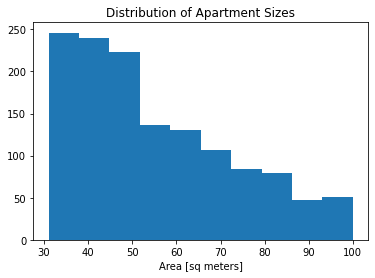

In [9]:
plt.hist(df["surface_covered_in_m2"])
plt.xlabel("Area [sq meters]")
plt.title("Distribution of Apartment Sizes")
plt.savefig("images/2-1-4.png", dpi=150);

Yikes! When you see a histogram like the one above, it suggests that there are outliers in your dataset. This can affect model performance — especially in the sorts of linear models we'll learn about in this project. To confirm, let's look at the summary statistics for the `"surface_covered_in_m2"` feature. 

**Task 2.1.5:** Calculate the summary statistics for `df` using the [`describe`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) method. 

In [10]:
df.describe()["surface_covered_in_m2"]

count    1343.000000
mean       55.076694
std        18.160427
min        31.000000
25%        40.000000
50%        50.000000
75%        68.500000
max       100.000000
Name: surface_covered_in_m2, dtype: float64

The statistics above confirm what we suspected. While most of the apartments in our dataset are smaller that 73 square meters, there are some that are several thousand square meters. The best thing to do is to change our `wrangle` function and remove them from the dataset. 

**Task 2.1.6:** Add to your wrangle function so that it removes observations that are outliers in the `"surface_covered_in_m2"` column. Specifically, all observations should fall between the `0.1` and `0.9` quantiles for `"surface_covered_in_m2"`.

When you're done, don't forget to rerun all the cells above. Note how your histogram changes now that there are no outliers. At this point, `df` should have no more than 1,343 observations.

In [11]:
low, high = df["surface_covered_in_m2"].quantile([0.1,0.9])
mask_area = df["surface_covered_in_m2"].between(low, high)
mask_area.head()

4     True
9     True
29    True
40    True
41    True
Name: surface_covered_in_m2, dtype: bool

Now that our dataset is free of outliers, it's time to start exploring the relationship between apartment size and price. Let's use one of the tools we learned in the last project.

**Task 2.1.7:** Create a scatter plot that shows price (`"price_aprox_usd"`) vs area (`"surface_covered_in_m2"`) in our dataset. Make sure to label your x-axis `"Area [sq meters]"` and your y-axis `"Price [USD]"`.

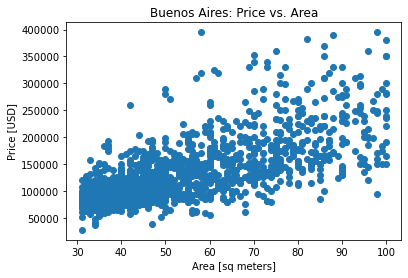

In [12]:
plt.scatter(x=df["surface_covered_in_m2"],y=df["price_aprox_usd"])
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Buenos Aires: Price vs. Area")
plt.savefig("images/2-1-7.png", dpi=150)

This plot suggests that there's a moderate positive correlation between apartment price and size. This means that if  thing we want to predict is price, size will be a good feature to include. 

## Split

A key part in any model-building project is separating your **target** (the thing you want to predict) from your **features** (the information your model will use to make its predictions). Since this is our first model, we'll use just one feature: apartment size.

**Task 2.1.8:** Create the feature matrix named `X_train`, which you'll use to train your model. It should contain one feature only: `["surface_covered_in_m2"]`. Remember that your feature matrix should always be two-dimensional. 


In [13]:
features = ["surface_covered_in_m2"]
X_train = df[features]
X_train.shape
X_train

,surface_covered_in_m2
4,70.0
9,42.0
29,54.0
40,42.0
41,50.0
...,...
8589,42.0
8590,41.0
8593,43.0
8601,70.0


Now that we have a features, the next step is to create a target. (By the way, you may have noticed that we're adding a `_train` tag to the variable names for our feature matrix and target vector. This is to remind us that this is the data we'll use to *train* our model, and not the data we'll use to *test* it.)

**Task 2.1.9:** Create the target vector named `y_train`, which you'll use to train your model. Your target should be `"price_aprox_usd"`. Remember that, in most cases, your target vector should be one-dimensional. 



In [14]:
target = "price_aprox_usd"
y_train = df[target]
y_train.shape

(1343,)

In [15]:
# Check your work
assert y_train.shape == (1343,)

# Build Model

## Baseline

The first step in building a model is baselining. To do this, ask yourself how you will know if the model you build is performing well?" One way to think about this is to see how a "dumb" model would perform on the same data. Some people also call this a naïve or baseline model, but it's always a model makes only one prediction — in this case, it predicts the same price regardless of an apartment's size. So let's start by figuring out what our baseline model's prediction should be. 

**Task 2.1.10:** Calculate the mean of your target vector `y_train` and assign it to the variable `y_mean`.


In [16]:
y_mean = y_train.mean()
y_mean

135527.83871928512

Now that we have the one prediction that our dumb model will always make, we need to generate a list that repeats the prediction for every observation in our dataset. 

**Task 2.1.11:** Create a list named `y_pred_baseline` that contains the value of `y_mean` repeated so that it's the same length at `y`.


In [17]:
y_pred_baseline = [y_mean]*len(y_train)
y_pred_baseline[:5]

[135527.83871928512,
 135527.83871928512,
 135527.83871928512,
 135527.83871928512,
 135527.83871928512]

So how does our baseline model perform? One way to evaluate it is by plotting it on top of the scatter plot we made above. 

**Task 2.1.12:** Add a line to the plot below that shows the relationship between the observations `X_train` and our dumb model's predictions `y_pred_baseline`. Be sure that the line color is orange, and that it has the label `"Baseline Model"`.


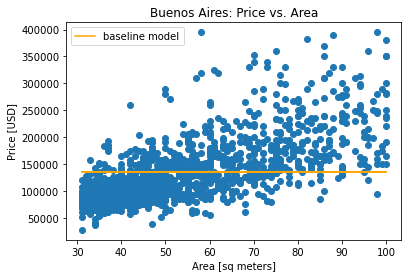

In [18]:
plt.plot(X_train["surface_covered_in_m2"],y_pred_baseline,color="orange",label="baseline model")
plt.scatter(X_train, y_train)
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Buenos Aires: Price vs. Area")
plt.legend();
plt.savefig("images/2-1-12.png", dpi=150)

Looking at this visualization, it seems like our baseline model doesn't really follow the trend in the data. But, as a data scientist, you can't depend only on a subjective plot to evaluate a model. You need an exact, mathematically calculate **performance metric**. There are lots of performance metrics, but the one we'll use here is the **mean absolute error**.  

**Task 2.1.13:** Calculate the baseline mean absolute error for your predictions in `y_pred_baseline` as compared to the true targets in `y`.

In [19]:
mae_baseline = mean_absolute_error(y_train,y_pred_baseline)

print("Mean apt price", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean apt price 135527.84
Baseline MAE: 45199.46


What does this information tell us? If we always predicted that an apartment price is \\$135,527.84, our predictions would be off by an average of \\$45,199.46. It also tells us that our model needs to have mean absolute error below \\$45,199.46 in order to be useful. 

## Iterate

The next step in building a model is iterating. This involves building a model, training it, evaluating it, and then repeating the process until you're happy with the model's performance. Even though the model we're building is linear, the iteration process rarely follows a straight line. Be prepared for trying new things, hitting dead-ends, and waiting around while your computer does long computations to train your model. ☕️ Let's get started! 

The first thing we need to do is create our model — in this case, one that uses linear regression.  

**Task 2.1.14:** Instantiate a [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) model named `model`.


In [20]:
model = LinearRegression()

In [21]:
# Check your work
assert isinstance(model, LinearRegression)

The second thing we need to do is use our data to train our model. Another way to say this is fit our model to the training data.

**Task 2.1.15:** Fit your model to the data, `X_train` and `y_train`.

In [22]:
model.fit(X_train,y_train)

LinearRegression()

In [23]:
# Check your work
check_is_fitted(model)

## Evaluate

The final step is to evaluate our model. In order to do that, we'll start by seeing how well it performs when making predictions for data that it saw during training. So let's have it predict the price for the houses in our training set.

**Task 2.1.16:** Using your model's [`predict`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict) method, create a list of predictions for the observations in your feature matrix `X_train`. Name this array `y_pred_training`. 


In [24]:
y_pred_training = model.predict(X_train)
y_pred_training[:5]

array([169151.87330223, 106064.44707446, 133101.91545779, 106064.44707446,
       124089.42599668])

Now that we have predictions, we'll use them to assess our model's performance with the training data. We'll use the same metric we used to evaluate our baseline model: mean absolute error. 

**Task 2.1.17:** Calculate your training mean absolute error for your predictions in `y_pred_training` as compared to the true targets in `y_train`.

In [25]:
mae_training = mean_absolute_error(y_train,y_pred_training)
print("Training MAE:", round(mae_training, 2))

Training MAE: 31248.26


Good news: Our model beat the baseline by over \$10,000! That's a good indicator that it will be helpful in predicting apartment prices. But the real test is how the model performs on data that it hasn't seen before, data that we call the **test set**. In the future, you'll create your own test set before you train your model, but here we'll use one that's pre-made, and we'll evaluate the model using the WQU auto-grader. 

**Task 2.1.18:** Run the code below to import your test data `buenos-aires-test-features.csv` into a DataFrame and generate a Series of predictions using your model. Then run the following cell to submit your predictions to the grader.


In [26]:
X_test = pd.read_csv("data/buenos-aires-test-features.csv")[features]
y_pred_test = pd.Series(model.predict(X_test))
y_pred_test.head()

0    117330.058901
1    135355.037823
2     88039.468152
3     88039.468152
4    106064.447074
dtype: float64

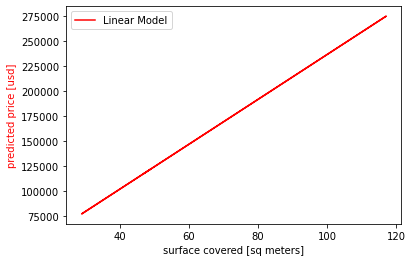

In [27]:
plt.plot(X_test.squeeze(),y_pred_test, color="r" , label="Linear Model")
plt.xlabel("surface covered [sq meters]")
plt.ylabel("predicted price [usd]",color="r")
plt.legend();

Once your model is built and tested, it's time to share it with others. If you're presenting to simple linear model to a technical audience, they might appreciate an equation. When we created our baseline model, we represented it as a line. The equation for a line like this is usually written as:

<img src="images/Screenshot_69.png" alt="Example Image" width="300">
Since data scientists often work with more complicated linear models, they prefer to write the equation as:

<img src="images/Screenshot_70.png" alt="Example Image" width="300">
Regardless of how we write the equation, we need to find the values that our model has determined for the intercept and and coefficient. Fortunately, all trained models in scikit-learn store this information in the model itself. Let's start with the intercept.

**Task 2.1.19:** Extract the intercept from your model, and assign it to the variable `intercept`. 


In [28]:
intercept = round(model.intercept_,2)
print("Model Intercept:", intercept)

Model Intercept: 11433.31


**Task 2.1.20:** Extract the coefficient associated `"surface_covered_in_m2"` in your model, and assign it to the variable `coefficient`.

In [29]:
coefficient = round(model.coef_[0],2)
print('Model coefficient for "surface_covered_in_m2":', coefficient)

Model coefficient for "surface_covered_in_m2": 2253.12


Now that we have our `intercept` and `coefficient`, we need to insert them into a string that we can print out the complete equation.

In [30]:
print(f"apt_price={intercept}+{coefficient}*Surface_covered")

apt_price=11433.31+2253.12*Surface_covered


**Task 2.1.22:** Add a line to the scatter plot that shows the relationship between the observations in `X_train` and your model's predictions `y_pred_training`. Be sure that the line color is red, and that it has the label `"Linear Model"`.

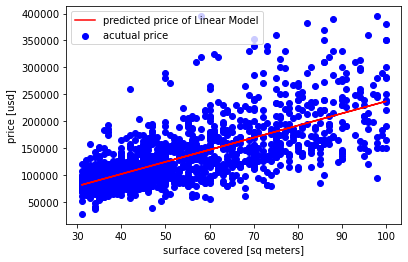

In [31]:
plt.plot(X_train["surface_covered_in_m2"], y_pred_training , color="r" , label="predicted price of Linear Model")
plt.scatter(X_train, y_train,color="b" , label="acutual price")
plt.xlabel("surface covered [sq meters]")
plt.ylabel("price [usd]")
plt.legend();
plt.savefig("images/2-1-22.png", dpi=150)